# Thesis 2020-2021: Hate Speech Detection
## Baselines Subtask A

The following two baselines have been considered by the organizers of this competition in order to provide a benchmark for the comparison of the submitted systems: 
1. The MFC (Most Frequent Classifier) baseline: Trivial model that assigns the most frequent label, estimated on the
training set, to all the instances in the test set.
2. The SVC (Support Vector Classifier) baseline: Linear Support Vector Machine (SVM) based on a TF-IDF representation, where the hyper-parameters are the default values set by the scikit-learn Python library.

In [11]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook

We start off by reading the training and development data into a pandas dataframe. 
Columns TR and AG columns are removed as they are irrelevant for Subtask A.

In [12]:
import csv
    
df_train = pd.read_csv('data/hateval2019_en_train.csv')
df_dev = pd.read_csv('data/hateval2019_en_dev.csv')
print(df_train)
df_train_dev = df_train.append(df_dev, ignore_index=True)
df_train_dev = df_train_dev.drop(['TR', 'AG'], axis=1)

df_test = pd.read_csv('data/hateval2019_en_test.csv')
df_test = df_test.drop(['TR', 'AG'], axis=1)

df_train_dev

        id                                               text  HS  TR  AG
0      201  Hurray, saving us $$$ in so many ways @potus @...   1   0   0
1      202  Why would young fighting age men be the vast m...   1   0   0
2      203  @KamalaHarris Illegals Dump their Kids at the ...   1   0   0
3      204  NY Times: 'Nearly All White' States Pose 'an A...   0   0   0
4      205  Orban in Brussels: European leaders are ignori...   0   0   0
...    ...                                                ...  ..  ..  ..
8995  9196  @mmdwriter @JRubinBlogger @BenSasse I am proud...   0   0   0
8996  9197  @CheriJacobus Hollywood is complicit in the ra...   0   0   0
8997  9198  @amaziah_filani What a fucking cunt I hate see...   1   1   1
8998  9199                  Hysterical woman like @CoryBooker   0   0   0
8999  9200  Nearly every woman I know has #meToo in their ...   0   0   0

[9000 rows x 5 columns]


,id,text,HS
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1
1,202,Why would young fighting age men be the vast m...,1
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0
4,205,Orban in Brussels: European leaders are ignori...,0
...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0
9998,19199,I hate bitches who talk about niggaz with kids...,1


The English dataset is composed out of 13.000 tweets. Out of these tweets, 10.000 are meant for training and development (9.000 training tweets + 1.000 development tweets). As expected, we have 10.000 rows in this dataframe because we have appended both training and development data together.

In [13]:
print(df_train_dev.shape) 

(10000, 3)


## TODO: Plot some great visualizations with this DATA!

## 1. MFC baseline
#### Now we will program the MFC (Most Frequent Classifier Trivial) baseline, which assigns the most frequent label, estimated on the training set, to all the instances in the test set.

First, we compute the most frequent label for HS (Hate Speech), estimated on the training set.

In [14]:
print(df_train_dev['HS'].value_counts())
most_frequent_label = df_train_dev['HS'].value_counts().index[0]
print(f'The most frequent label for HS is: {most_frequent_label}. This means that most tweets in the training set are not labelled as hate speech.')

0    5790
1    4210
Name: HS, dtype: int64
The most frequent label for HS is: 0. This means that most tweets in the training set are not labelled as hate speech.


Next, we read the test set into a dataframe and assign to it the most frequent label that we just computed.

In [15]:
df_test_mfc = df_test.copy()
df_test_mfc['HS'] = [most_frequent_label]*df_test_mfc.shape[0]
df_test_mfc

,id,text,HS
0,34243,"@local1025 @njdotcom @GovMurphy Oh, I could ha...",0
1,30593,Several of the wild fires in #california and #...,0
2,31427,@JudicialWatch My question is how do you reset...,0
3,31694,"#Europe, you've got a problem! We must hurry...",0
4,31865,This is outrageous! #StopIllegalImmigration #...,0
...,...,...,...
2995,31368,you can never take a L off a real bitch😩 im ho...,0
2996,30104,@Brian_202 likes to call me a cunt & a bitch b...,0
2997,31912,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,0
2998,31000,If i see and know you a hoe why would i hit yo...,0


In [40]:
# Compute the F1-score manually
f1_mfc = f1_score(df_test['HS'].values, df_test_mfc['HS'].values, average='macro')
print(f'The macro-averaged F1 score for the MFC baseline is: {f1_mfc}') 

# Great! This corresponds with the paper!

The macro-averaged F1 score for the MFC baseline is: 0.36708860759493667


In [17]:
# Create prediction file for the mfc_baseline
df_test_mfc[['id', 'HS']].to_csv('predictions/mfc_baseline.tsv', sep='\t', index=False, header=False)
df_test_mfc[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the mfc_baseline
evaluate.write_eval("scores_mfc")

taskA_fscore: 0.36708860759493667
taskA_precision: 0.29
taskA_recall: 0.5
taskA_accuracy: 0.58


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test.HS, df_test_mfc.HS)

array([[1740,    0],
       [1260,    0]], dtype=int64)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## 2. SVC baseline
#### Now we will program the SVM (Linear Support Vector Machine) baseline, which is based on a TF-IDF representation, where the hyper-parameters are the default values set by the scikit-learn Python library

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train classifier
clf = SVC().fit(X_train, y_train)
predictions = clf.predict(X_test)
f1_svc = f1_score(y_test.values, predictions, average='macro')
print(f'The macro-averaged F1 score for the SVC baseline is: {f1_svc}')

# Does NOT correspond with the paper!!! (paper SVC f1-score for Subtask A: 0.451) TODO: FIX model 

df_test_svc = df_test.copy()
df_test_svc['HS'] = predictions

# Create prediction file for the svc_baseline
df_test_svc[['id', 'HS']].to_csv('predictions/svc_baseline.tsv', sep='\t', index=False, header=False)
df_test_svc[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the svc_baseline
evaluate.write_eval("scores_svc")

The macro-averaged F1 score for the SVC baseline is: 0.43130790319531104
taskA_fscore: 0.43130790319531104
taskA_precision: 0.6281625422133643
taskA_recall: 0.5506841817186645
taskA_accuracy: 0.4866666666666667


In [39]:
confusion_matrix(df_test.HS, predictions)

array([[ 262, 1478],
       [  62, 1198]], dtype=int64)

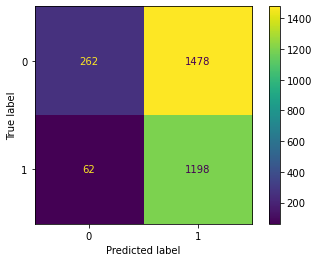

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()


## Improved versions of TF-IDF

In [4]:
X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

In [10]:
# Evaluate the TF-IDF model using Logistic Regression as the classifier (+ normalized input data)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Normalize the data
scaler = preprocessing.StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

# train classifier
clf = LogisticRegression().fit(X_train_scaled, y_train)
predictions_scaled = clf.predict(X_test_scaled)
f1_svc = f1_score(y_test.values, predictions_scaled, average='macro')
print(f'The macro-averaged F1 score: {f1_svc}')

df_test_logreg_scaled = df_test.copy()
df_test_logreg_scaled['HS'] = predictions_scaled

# Create prediction file for the tf_idf_logreg
df_test_logreg_scaled[['id', 'HS']].to_csv('predictions/tf_idf_logreg.tsv', sep='\t', index=False, header=False)
df_test_logreg_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the svc_baseline
evaluate.write_eval("scores_tf_idf_logreg")

The macro-averaged F1 score: 0.5069024424026963
taskA_fscore: 0.5069024424026963
taskA_precision: 0.5985040567951319
taskA_recall: 0.5708812260536398
taskA_accuracy: 0.5253333333333333


In [9]:
# Evaluate the TF-IDF model using Logistic Regression as the classifier (+ normalized input data)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model, decomposition, datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Normalize the data
scaler = preprocessing.StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

# Apply PCA
pca = decomposition.PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# train classifier
clf = LogisticRegression().fit(X_train_scaled_pca, y_train)
predictions_scaled = clf.predict(X_test_scaled_pca)
f1_svc = f1_score(y_test.values, predictions_scaled, average='macro')
print(f'The macro-averaged F1 score: {f1_svc}')

df_test_logreg_scaled = df_test.copy()
df_test_logreg_scaled['HS'] = predictions_scaled

# Create prediction file for the tf_idf_logreg
df_test_logreg_scaled[['id', 'HS']].to_csv('predictions/tf_idf_logreg.tsv', sep='\t', index=False, header=False)
df_test_logreg_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the svc_baseline
evaluate.write_eval("scores_tf_idf_logreg")

The macro-averaged F1 score: 0.5069024424026963
taskA_fscore: 0.5069024424026963
taskA_precision: 0.5985040567951319
taskA_recall: 0.5708812260536398
taskA_accuracy: 0.5253333333333333


In [10]:
# Evaluate the TF-IDF model using Logistic Regression as the classifier (+ normalized input data + GridSearch optimization)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn import preprocessing

X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Normalize the data
scaler = preprocessing.StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

f1 = make_scorer(f1_score , average='macro')
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ('newton-cg', 'lbfgs', 'liblinear'), 'penalty': ('l1', 'l2', 'elasticnet')}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, scoring=f1, verbose=5, n_jobs=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 148 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 306 out of 315 | elapsed:   20.7s remaining:    0.5s
[Parallel(n_jobs=5)]: Done 315 out of 315 | elapsed:   21.9s finished


Best cross-validation score:  0.7231216895431565
Best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [9]:
# train classifier
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear').fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = f1_score(y_test.values, predictions, average='macro')
print(f'The macro-averaged F1 score: {f1}')

df_test_optimal = df_test.copy()
df_test_optimal['HS'] = predictions

# Create prediction file for the tf_idf_optimal
df_test_optimal[['id', 'HS']].to_csv('predictions/tf_idf_optimal.tsv', sep='\t', index=False, header=False)
df_test_optimal[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the tf_idf_optimal
evaluate.write_eval("scores_tf_idf_optimal")

The macro-averaged F1 score: 0.45295218358992884
taskA_fscore: 0.45295218358992884
taskA_precision: 0.6391066708480803
taskA_recall: 0.5623152709359606
taskA_accuracy: 0.5006666666666667


In [12]:
# train classifier
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear').fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
f1 = f1_score(y_test.values, predictions, average='macro')
print(f'The macro-averaged F1 score: {f1}')

df_test_scaled = df_test.copy()
df_test_scaled['HS'] = predictions

# Create prediction file for the tf_idf_scaled
df_test_scaled[['id', 'HS']].to_csv('predictions/tf_idf_scaled.tsv', sep='\t', index=False, header=False)
df_test_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the tf_idf_scaled
evaluate.write_eval("scores_tf_idf_scaled")

The macro-averaged F1 score: 0.4994436912363046
taskA_fscore: 0.4994436912363046
taskA_precision: 0.5944618868601118
taskA_recall: 0.5663245758073344
taskA_accuracy: 0.5196666666666667


In [7]:
# Evaluate the TF-IDF model using Random Forest Classifier (+ normalized input data)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Normalize the data
scaler = preprocessing.StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

# train classifier
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
predictions_scaled = clf.predict(X_test_scaled)
f1 = f1_score(y_test.values, predictions_scaled, average='macro')
print(f'The macro-averaged F1 score: {f1}')

df_test_scaled = df_test.copy()
df_test_scaled['HS'] = predictions_scaled

# Create prediction file for the tf_idf_scaled
df_test_scaled[['id', 'HS']].to_csv('predictions/tf_idf_scaled.tsv', sep='\t', index=False, header=False)
df_test_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# # Evaluate the result of the tf_idf_scaled
evaluate.write_eval("scores_tf_idf_scaled")

The macro-averaged F1 score: 0.3901300391242303


NameError: name 'predictions' is not defined

In [8]:
#print('**How to optimize hyper-parameters of a LR model using Grid Search in Python**')
   
# loading libraries
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import TruncatedSVD

# Loading the dataset
X_train = df_train_dev.text
X_test = df_test.text
y_train = df_train_dev.HS
y_test = df_test.HS

# Creating an TF-IDF object
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Creating an scaler object
#std_slc = StandardScaler(with_mean=False)
scaler = StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train.toarray())
#X_test_scaled = scaler.transform(X_test.toarray())

# Creating a pca object
pca = decomposition.PCA()
#svd = TruncatedSVD()

# Creating F1-score
f1 = make_scorer(f1_score , average='macro')

# Creating a logistic regression object
logistic_Reg = linear_model.LogisticRegression()

# Creating a pipeline of three steps. First, standardizing the data.
# Second, tranforming the data with PCA.
# Third, training a logistic regression on the data.
pipe = Pipeline(steps=[#('std_slc', std_slc),
                       ('pca', pca),
                       ('logistic_Reg', logistic_Reg)])

# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,10,1))
#n_components = list(range(1,X_train.shape[1]+1,1))

# Creating a list of values of the regularization parameter
C = np.logspace(-4, 15, 50)
# Creating a list of options for the regularization penalty
penalty = ['l1', 'l2']
# Creating a dictionary of all the parameter options 
# Note has we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                  logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty,
                  logistic_Reg__verbose=[True])

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters, scoring=f1)

# Fitting the grid search
clf_GS.fit(X_train_scaled, y_train)
# Viewing The Best Parameters
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

KeyboardInterrupt: 

In [97]:
# EXTRA: Easy TF-IDF example to understand how the TfidfVectorizer() works.

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X = X.toarray()
X

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])